# Generative Models

In this notebook I am going to do experiments about how image generation with autoencoders can be. 

In [1]:
from typing import List
import os

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

import torch

import config
from experiments import vae

mpl.rcParams['figure.dpi'] = 300

c:\Users\Pedro work\Projects\envs\py39pytorch\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Dataset

The dataset that I have selected for this task is the Flickr-Faces-HQ (FFHQ) which is a "high-quality image dataset of human faces, originally created as a benchmark for generative adversarial networks (GAN)".

In this case the 128x128 resolution version of the dataset is going to be used, the main reason for this choice is that this experimentation is mainly focused on learning how to implement and train models not in achieving great result for high resolutions.

![FFHQ Teaset](data\images\ffhq-teaser.png)

## Variational Autoencoder

In this part we are going to show some examples of the results obtained with the variational autoencoder model.

In [2]:
network = vae["network"]

model = network(**vae)
model.load_state_dict(torch.load(os.path.join(config.model_path, vae["experiment"])))
model.eval()

print(f"Trainable parameters: {sum(param.numel() for param in model.parameters() if param.requires_grad)}")
print(f"Total parameters: {sum(param.numel() for param in model.parameters())}")
print()

Trainable parameters: 12807075
Total parameters: 12807075



In [15]:
def postprocess_image(image):
    image = (image + 1) / 2
    return image

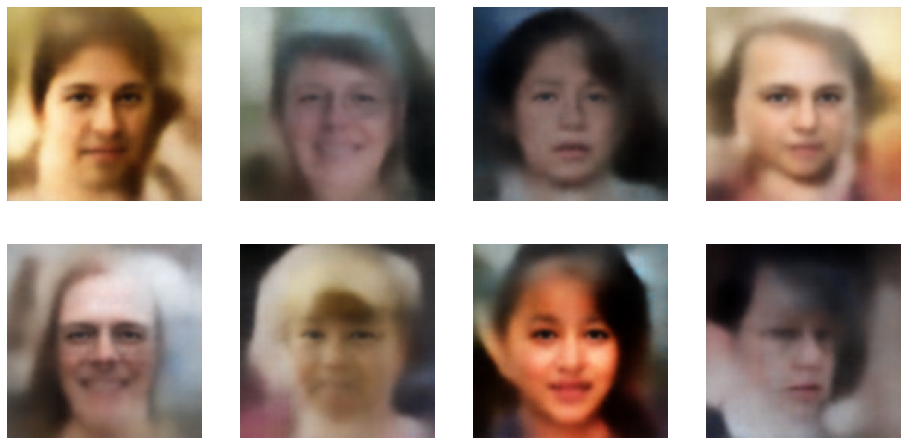

In [41]:
samples = model.sample(num_samples=8, current_device=next(model.parameters()).device)

figure = plt.figure(figsize=(16, 8))
cols, rows = 4, 2
for i in range(0, cols * rows):
    postprocessed_image = postprocess_image(samples[i].squeeze().detach().numpy())
    img = np.transpose(postprocessed_image, [1, 2, 0])
    figure.add_subplot(rows, cols, i+1)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()